# Đọc dữ liệu và tiền xử lý

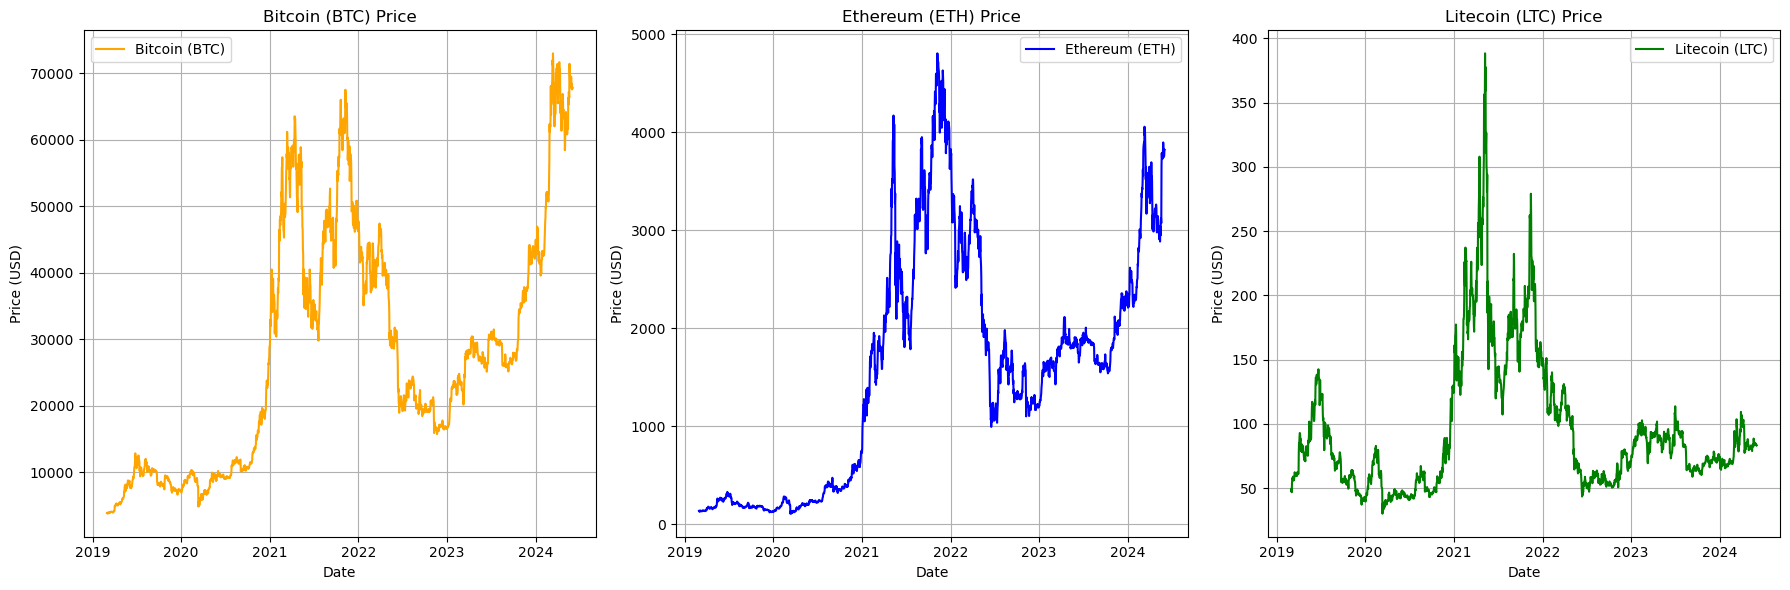

In [157]:
# Import thư viện cần thiết
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM

df_btc = pd.read_csv('BTCUSD_d.csv')
df_eth = pd.read_csv('ETHUSD_d.csv')
df_ltc = pd.read_csv('LTCUSD_d.csv')

#định dạng cấu trúc thời gian
df_btc['date'] = pd.to_datetime(df_btc['date'])
df_eth['date'] = pd.to_datetime(df_eth['date'])
df_ltc['date'] = pd.to_datetime(df_ltc['date'])

#Đảo ngược thứ tự dòng
df_btc = df_btc.sort_index(ascending=False)
df_eth = df_eth.sort_index(ascending=False)
df_ltc = df_ltc.sort_index(ascending=False)

# Lấy dữ liệu từ ngày 1/3/2019 đến ngày 1/3/2024
start_date = '2019-03-01'
end_date = '2024-06-02'

df_btc = df_btc.loc[(df_btc['date'] >= start_date) & (df_btc['date'] <= end_date)]
df_eth = df_eth.loc[(df_eth['date'] >= start_date) & (df_eth['date'] <= end_date)]
df_ltc = df_ltc.loc[(df_ltc['date'] >= start_date) & (df_ltc['date'] <= end_date)]

# Lấy date làm index và chỉ lấy cột collumn
df_btc = pd.DataFrame(df_btc,columns=['date','close'])
df_btc.index = df_btc.date
df_btc.drop('date',axis=1,inplace=True)
# Lấy date làm index và chỉ lấy cột 'close' cho Ethereum (ETH)
df_eth = pd.DataFrame(df_eth, columns=['date', 'close'])
df_eth.index = df_eth['date']
df_eth.drop('date', axis=1, inplace=True)
# Lấy date làm index và chỉ lấy cột 'close' cho Litecoin (LTC)
df_ltc = pd.DataFrame(df_ltc, columns=['date', 'close'])
df_ltc.index = df_ltc['date']
df_ltc.drop('date', axis=1, inplace=True)


# Khởi tạo figure và axes với lưới 1x3 (1 hàng, 3 cột)
fig, axs = plt.subplots(1, 3, figsize=(18, 6))

# Vẽ biểu đồ cho Bitcoin (BTC)
axs[0].plot(df_btc.index, df_btc['close'], label='Bitcoin (BTC)', color='orange')
axs[0].set_title('Bitcoin (BTC) Price')
axs[0].set_xlabel('Date')
axs[0].set_ylabel('Price (USD)')
axs[0].legend()
axs[0].grid(True)

# Vẽ biểu đồ cho Ethereum (ETH)
axs[1].plot(df_eth.index, df_eth['close'], label='Ethereum (ETH)', color='blue')
axs[1].set_title('Ethereum (ETH) Price')
axs[1].set_xlabel('Date')
axs[1].set_ylabel('Price (USD)')
axs[1].legend()
axs[1].grid(True)

# Vẽ biểu đồ cho Litecoin (LTC)
axs[2].plot(df_ltc.index, df_ltc['close'], label='Litecoin (LTC)', color='green')
axs[2].set_title('Litecoin (LTC) Price')
axs[2].set_xlabel('Date')
axs[2].set_ylabel('Price (USD)')
axs[2].legend()
axs[2].grid(True)

plt.tight_layout()
plt.show()

# BTC

## Chia 8:2

In [158]:
df1=df_btc.reset_index()['close']
df1

0        3914.0
1        3913.0
2        3885.0
3        3800.3
4        3951.6
         ...   
1916    67720.0
1917    68413.0
1918    67582.0
1919    67759.0
1920    67804.0
Name: close, Length: 1921, dtype: float64

In [159]:
# 3. Scaler data
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))

In [160]:
df1

array([[0.00164312],
       [0.00162867],
       [0.00122403],
       ...,
       [0.9217315 ],
       [0.92428939],
       [0.9249397 ]])

In [161]:
# 4. Chia train test
train_size = int(0.8 * len(df1))
test_size = int(0.2 * len(df1))

train_data = df1[:train_size]
test_data = df1[train_size:train_size+test_size]

# In kích thước của tập huấn luyện và tập kiểm tra
print(f"Train size: {len(train_data)}")
print(f"Test size: {len(test_data)}")

Train size: 1536
Test size: 384


In [162]:
# 5. Hàm Create Dataset
import numpy
# convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]   ###i=0, X=0,1,2,3-----99   Y=100 
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return numpy.array(dataX), numpy.array(dataY)

In [163]:
#6. Reshape into X=t,t+1,t+2..t+99 and Y=t+100

time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

# In kích thước của tập dữ liệu huấn luyện và kiểm tra để kiểm tra
print(f"X_train shape: {X_train.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_test shape: {ytest.shape}")

X_train shape: (1435, 100)
y_train shape: (1435,)
X_test shape: (283, 100)
y_test shape: (283,)


In [164]:
# 7. Reshape input to be [samples, time steps, features] which is required for LSTM
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [165]:
X_train.shape

(1435, 100, 1)

In [166]:
X_test.shape

(283, 100, 1)

In [167]:
# 8. Define LSTM Model

model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

C:\Users\hoang\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [168]:
# 9. Fit mô hình với dữ liệu train
model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=100,batch_size=64,verbose=1)

Epoch 1/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 6s 80ms/step - loss: 0.0593 - val_loss: 0.0043
Epoch 2/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 61ms/step - loss: 0.0041 - val_loss: 0.0061
Epoch 3/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 60ms/step - loss: 0.0026 - val_loss: 0.0036
Epoch 4/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 62ms/step - loss: 0.0023 - val_loss: 0.0027
Epoch 5/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 62ms/step - loss: 0.0023 - val_loss: 0.0035
Epoch 6/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 62ms/step - loss: 0.0020 - val_loss: 0.0027
Epoch 7/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 60ms/step - loss: 0.0020 - val_loss: 0.0022
Epoch 8/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 61ms/step - loss: 0.0017 - val_loss: 0.0039
Epoch 9/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 60ms/step - loss: 0.0019 - val_loss: 0.0020
Epoch 10/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 63ms/step - loss: 0.0015 - val_loss: 0.0016
Epoch 11/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 61ms/step - loss: 0.0016 - val_loss: 0.0022
Epoch 12/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 60ms/step

In [169]:
# 10. Dự báo dữ liệu test
train_predict=model.predict(X_train)
y_pred=model.predict(X_test)

45/45 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step


In [170]:
# 11. Chuẩn hóa dữ liệu y_pred, y_pred_val
train_predict=scaler.inverse_transform(train_predict)
y_pred=scaler.inverse_transform(y_pred)

In [171]:
# Chuẩn hóa dữ liệu y_test
y_test_scaled = scaler.inverse_transform(ytest.reshape(-1, 1))

In [172]:
# 12. Đánh giá độ chính xác thuật toán bằng RMSE, MSE, MAPE
test_rmse = np.sqrt(np.mean((y_pred - y_test_scaled)**2))
test_mse = np.mean((y_pred - y_test_scaled)**2)
test_mape = np.mean(np.abs((y_test_scaled - y_pred) / y_test_scaled)) * 100

print('Testing RMSE:', test_rmse)
print('Testing MSE:', test_mse)
print('Testing MAPE:', test_mape)


Testing RMSE: 1508.6081108053302
Testing MSE: 2275898.4319876274
Testing MAPE: 2.4289107806479886


In [173]:
# 13. Hàm dự đoán cho n ngày tiếp theo
def predict_future_days(n_days, test_data, model):
    x_input = test_data[60:].reshape(1, -1)
    temp_input=list(x_input)
    temp_input=temp_input[0].tolist()
    
    lst_output = []
    n_steps=x_input.shape[1]
    i=0
    while(i< n_days):
        if(len(temp_input)>x_input.shape[1]):
            #print(temp_input)
            x_input=np.array(temp_input[1:])
            #print("{} day input {}".format(i,x_input))
            x_input=x_input.reshape(1,-1)
            x_input = x_input.reshape((1, n_steps, 1))
            #print(x_input)
            yhat = model.predict(x_input, verbose=0)
            #print("{} day output {}".format(i,yhat))
            temp_input.extend(yhat[0].tolist())
            temp_input=temp_input[1:]
            #print(temp_input)
            lst_output.extend(yhat.tolist())
            i=i+1
        else:
            x_input = x_input.reshape((1, n_steps,1))
            yhat = model.predict(x_input, verbose=0)
            #print(yhat[0])
            temp_input.extend(yhat[0].tolist())
            #print(len(temp_input))
            lst_output.extend(yhat.tolist())
            i=i+1
    
    return lst_output

# Dự đoán 30 ngày tiếp theo
predicted_30_days = predict_future_days(30, test_data, model)

# Dự đoán 60 ngày tiếp theo
predicted_60_days = predict_future_days(60, test_data, model)

# Dự đoán 90 ngày tiếp theo
predicted_90_days = predict_future_days(90, test_data, model)

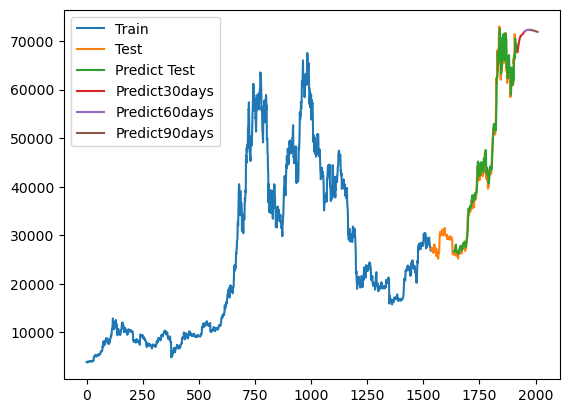

In [174]:
# 14.Vẽ hình

train_data_index = pd.RangeIndex(start=0, stop=train_size, step=1)
plt.plot(scaler.inverse_transform(train_data))

test_data_index = pd.RangeIndex(start=train_size, stop=train_size+test_size, step=1)
plt.plot(test_data_index,scaler.inverse_transform(test_data))

test_data_index = pd.RangeIndex(start=train_size+101, stop=train_size+test_size, step=1)
plt.plot(test_data_index,(y_pred))

# Vẽ dữ liệu dự đoán 30 ngày
predict_30days_index = pd.RangeIndex(start=len(df1) - 1, stop=len(df1) + 30 - 1, step=1)
plt.plot(predict_30days_index, scaler.inverse_transform(predicted_30_days))

# Vẽ dữ liệu dự đoán 60 ngày
predict_60days_index = pd.RangeIndex(start=len(df1) + 30 - 1, stop=len(df1) + 60 - 1, step=1)
plt.plot(predict_60days_index, scaler.inverse_transform(predicted_60_days)[30:])

# Vẽ dữ liệu dự đoán 90 ngày
predict_90days_index = pd.RangeIndex(start=len(df1) +60 -1, stop=len(df1) + 90 - 1, step=1)
plt.plot(predict_90days_index, scaler.inverse_transform(predicted_90_days)[60:])

plt.legend(['Train','Test','Predict Test','Predict30days','Predict60days','Predict90days'])
plt.show()

## Chia 7:3

In [175]:
df1=df_btc.reset_index()['close']
df1

0        3914.0
1        3913.0
2        3885.0
3        3800.3
4        3951.6
         ...   
1916    67720.0
1917    68413.0
1918    67582.0
1919    67759.0
1920    67804.0
Name: close, Length: 1921, dtype: float64

In [176]:
# 3. Scaler data
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))

In [178]:
# 4. Chia train test
train_size = int(0.7 * len(df1))
test_size = int(0.3 * len(df1))

train_data = df1[:train_size]
test_data = df1[train_size:train_size+test_size]

# In kích thước của tập huấn luyện và tập kiểm tra
print(f"Train size: {len(train_data)}")
print(f"Test size: {len(test_data)}")

Train size: 1344
Test size: 576


In [179]:
# 5. Hàm Create Dataset
import numpy
# convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]   ###i=0, X=0,1,2,3-----99   Y=100 
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return numpy.array(dataX), numpy.array(dataY)

In [180]:
#6. Reshape into X=t,t+1,t+2..t+99 and Y=t+100

time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

# In kích thước của tập dữ liệu huấn luyện và kiểm tra để kiểm tra
print(f"X_train shape: {X_train.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_test shape: {ytest.shape}")

X_train shape: (1243, 100)
y_train shape: (1243,)
X_test shape: (475, 100)
y_test shape: (475,)


In [181]:
# 7. Reshape input to be [samples, time steps, features] which is required for LSTM
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [182]:
# 8. Define LSTM Model

model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

C:\Users\hoang\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [183]:
# 9. Fit mô hình với dữ liệu train
model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=100,batch_size=64,verbose=1)

Epoch 1/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 7s 135ms/step - loss: 0.0549 - val_loss: 0.0044
Epoch 2/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 65ms/step - loss: 0.0060 - val_loss: 0.0022
Epoch 3/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 66ms/step - loss: 0.0033 - val_loss: 0.0042
Epoch 4/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 66ms/step - loss: 0.0029 - val_loss: 0.0027
Epoch 5/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 65ms/step - loss: 0.0025 - val_loss: 0.0022
Epoch 6/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 67ms/step - loss: 0.0022 - val_loss: 0.0033
Epoch 7/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 67ms/step - loss: 0.0023 - val_loss: 0.0020
Epoch 8/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 67ms/step - loss: 0.0020 - val_loss: 0.0024
Epoch 9/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 66ms/step - loss: 0.0020 - val_loss: 0.0021
Epoch 10/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 66ms/step - loss: 0.0017 - val_loss: 0.0015
Epoch 11/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 64ms/step - loss: 0.0017 - val_loss: 0.0016
Epoch 12/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 65ms/ste

In [184]:
# 10. Dự báo dữ liệu test
train_predict=model.predict(X_train)
y_pred=model.predict(X_test)

39/39 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step


In [185]:
# 11. Chuẩn hóa dữ liệu y_pred, y_pred_val
train_predict=scaler.inverse_transform(train_predict)
y_pred=scaler.inverse_transform(y_pred)

# Chuẩn hóa dữ liệu y_test
y_test_scaled = scaler.inverse_transform(ytest.reshape(-1, 1))

In [186]:
# 12. Đánh giá độ chính xác thuật toán bằng RMSE, MSE, MAPE
test_rmse = np.sqrt(np.mean((y_pred - y_test_scaled)**2))
test_mse = np.mean((y_pred - y_test_scaled)**2)
test_mape = np.mean(np.abs((y_test_scaled - y_pred) / y_test_scaled)) * 100

print('Testing RMSE:', test_rmse)
print('Testing MSE:', test_mse)
print('Testing MAPE:', test_mape)


Testing RMSE: 1256.9155529992493
Testing MSE: 1579836.7073714084
Testing MAPE: 2.1294668544556736


In [187]:
# 13. Hàm dự đoán cho n ngày tiếp theo
def predict_future_days(n_days, test_data, model):
    x_input = test_data[60:].reshape(1, -1)
    temp_input=list(x_input)
    temp_input=temp_input[0].tolist()
    
    lst_output = []
    n_steps=x_input.shape[1]
    i=0
    while(i< n_days):
        if(len(temp_input)>x_input.shape[1]):
            #print(temp_input)
            x_input=np.array(temp_input[1:])
            #print("{} day input {}".format(i,x_input))
            x_input=x_input.reshape(1,-1)
            x_input = x_input.reshape((1, n_steps, 1))
            #print(x_input)
            yhat = model.predict(x_input, verbose=0)
            #print("{} day output {}".format(i,yhat))
            temp_input.extend(yhat[0].tolist())
            temp_input=temp_input[1:]
            #print(temp_input)
            lst_output.extend(yhat.tolist())
            i=i+1
        else:
            x_input = x_input.reshape((1, n_steps,1))
            yhat = model.predict(x_input, verbose=0)
            #print(yhat[0])
            temp_input.extend(yhat[0].tolist())
            #print(len(temp_input))
            lst_output.extend(yhat.tolist())
            i=i+1
    
    return lst_output

# Dự đoán 30 ngày tiếp theo
predicted_30_days = predict_future_days(30, test_data, model)

# Dự đoán 60 ngày tiếp theo
predicted_60_days = predict_future_days(60, test_data, model)

# Dự đoán 90 ngày tiếp theo
predicted_90_days = predict_future_days(90, test_data, model)

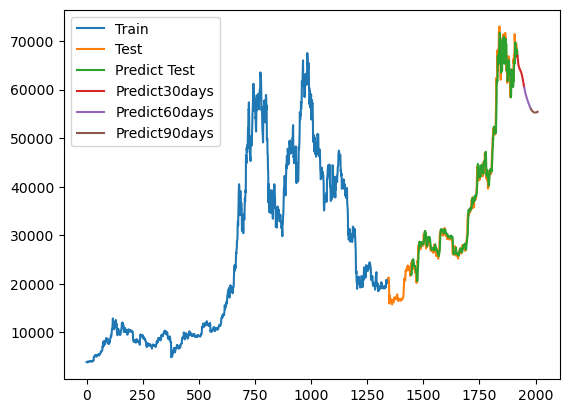

In [188]:
# 14.Vẽ hình

train_data_index = pd.RangeIndex(start=0, stop=train_size, step=1)
plt.plot(scaler.inverse_transform(train_data))

test_data_index = pd.RangeIndex(start=train_size, stop=train_size+test_size, step=1)
plt.plot(test_data_index,scaler.inverse_transform(test_data))

test_data_index = pd.RangeIndex(start=train_size+101, stop=train_size+test_size, step=1)
plt.plot(test_data_index,(y_pred))

# Vẽ dữ liệu dự đoán 30 ngày
predict_30days_index = pd.RangeIndex(start=len(df1) - 1, stop=len(df1) + 30 - 1, step=1)
plt.plot(predict_30days_index, scaler.inverse_transform(predicted_30_days))

# Vẽ dữ liệu dự đoán 60 ngày
predict_60days_index = pd.RangeIndex(start=len(df1) + 30 - 1, stop=len(df1) + 60 - 1, step=1)
plt.plot(predict_60days_index, scaler.inverse_transform(predicted_60_days)[30:])

# Vẽ dữ liệu dự đoán 90 ngày
predict_90days_index = pd.RangeIndex(start=len(df1) +60 -1, stop=len(df1) + 90 - 1, step=1)
plt.plot(predict_90days_index, scaler.inverse_transform(predicted_90_days)[60:])

plt.legend(['Train','Test','Predict Test','Predict30days','Predict60days','Predict90days'])
plt.show()

## Chia 6:4

In [202]:
df1=df_btc.reset_index()['close']
df1

0        3914.0
1        3913.0
2        3885.0
3        3800.3
4        3951.6
         ...   
1916    67720.0
1917    68413.0
1918    67582.0
1919    67759.0
1920    67804.0
Name: close, Length: 1921, dtype: float64

In [203]:
# 3. Scaler data
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))

In [204]:
# 4. Chia train test
train_size = int(0.6 * len(df1))
test_size = int(0.4 * len(df1))

train_data = df1[:train_size]
test_data = df1[train_size:train_size+test_size]

# In kích thước của tập huấn luyện và tập kiểm tra
print(f"Train size: {len(train_data)}")
print(f"Test size: {len(test_data)}")

Train size: 1152
Test size: 768


In [205]:
# 5. Hàm Create Dataset
import numpy
# convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]   ###i=0, X=0,1,2,3-----99   Y=100 
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return numpy.array(dataX), numpy.array(dataY)

In [206]:
#6. Reshape into X=t,t+1,t+2..t+99 and Y=t+100

time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

# In kích thước của tập dữ liệu huấn luyện và kiểm tra để kiểm tra
print(f"X_train shape: {X_train.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_test shape: {ytest.shape}")

X_train shape: (1051, 100)
y_train shape: (1051,)
X_test shape: (667, 100)
y_test shape: (667,)


In [207]:
# 7. Reshape input to be [samples, time steps, features] which is required for LSTM
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [208]:
# 8. Define LSTM Model

model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

C:\Users\hoang\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [209]:
# 9. Fit mô hình với dữ liệu train
model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=100,batch_size=64,verbose=1)

Epoch 1/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 6s 97ms/step - loss: 0.0754 - val_loss: 0.0095
Epoch 2/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 70ms/step - loss: 0.0053 - val_loss: 0.0020
Epoch 3/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 69ms/step - loss: 0.0033 - val_loss: 0.0018
Epoch 4/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 69ms/step - loss: 0.0026 - val_loss: 0.0021
Epoch 5/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 69ms/step - loss: 0.0028 - val_loss: 0.0037
Epoch 6/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 69ms/step - loss: 0.0032 - val_loss: 0.0018
Epoch 7/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 70ms/step - loss: 0.0022 - val_loss: 0.0024
Epoch 8/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 72ms/step - loss: 0.0023 - val_loss: 0.0019
Epoch 9/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 70ms/step - loss: 0.0021 - val_loss: 0.0016
Epoch 10/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 70ms/step - loss: 0.0019 - val_loss: 0.0027
Epoch 11/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 69ms/step - loss: 0.0024 - val_loss: 0.0015
Epoch 12/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 74ms/step

In [210]:
# 10. Dự báo dữ liệu test
train_predict=model.predict(X_train)
y_pred=model.predict(X_test)

33/33 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step


In [211]:
# 11. Chuẩn hóa dữ liệu y_pred, y_pred_val
train_predict=scaler.inverse_transform(train_predict)
y_pred=scaler.inverse_transform(y_pred)

# Chuẩn hóa dữ liệu y_test
y_test_scaled = scaler.inverse_transform(ytest.reshape(-1, 1))

In [212]:
# 12. Đánh giá độ chính xác thuật toán bằng RMSE, MSE, MAPE
test_rmse = np.sqrt(np.mean((y_pred - y_test_scaled)**2))
test_mse = np.mean((y_pred - y_test_scaled)**2)
test_mape = np.mean(np.abs((y_test_scaled - y_pred) / y_test_scaled)) * 100

print('Testing RMSE:', test_rmse)
print('Testing MSE:', test_mse)
print('Testing MAPE:', test_mape)


Testing RMSE: 1239.1752287652669
Testing MSE: 1535555.2475854515
Testing MAPE: 2.6718669791252845


In [213]:
# 13. Hàm dự đoán cho n ngày tiếp theo
def predict_future_days(n_days, test_data, model):
    x_input = test_data[60:].reshape(1, -1)
    temp_input=list(x_input)
    temp_input=temp_input[0].tolist()
    
    lst_output = []
    n_steps=x_input.shape[1]
    i=0
    while(i< n_days):
        if(len(temp_input)>x_input.shape[1]):
            #print(temp_input)
            x_input=np.array(temp_input[1:])
            #print("{} day input {}".format(i,x_input))
            x_input=x_input.reshape(1,-1)
            x_input = x_input.reshape((1, n_steps, 1))
            #print(x_input)
            yhat = model.predict(x_input, verbose=0)
            #print("{} day output {}".format(i,yhat))
            temp_input.extend(yhat[0].tolist())
            temp_input=temp_input[1:]
            #print(temp_input)
            lst_output.extend(yhat.tolist())
            i=i+1
        else:
            x_input = x_input.reshape((1, n_steps,1))
            yhat = model.predict(x_input, verbose=0)
            #print(yhat[0])
            temp_input.extend(yhat[0].tolist())
            #print(len(temp_input))
            lst_output.extend(yhat.tolist())
            i=i+1
    
    return lst_output

# Dự đoán 30 ngày tiếp theo
predicted_30_days = predict_future_days(30, test_data, model)

# Dự đoán 60 ngày tiếp theo
predicted_60_days = predict_future_days(60, test_data, model)

# Dự đoán 90 ngày tiếp theo
predicted_90_days = predict_future_days(90, test_data, model)

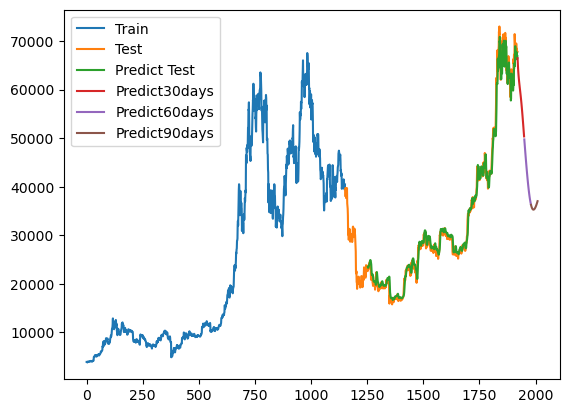

In [214]:
# 14.Vẽ hình

train_data_index = pd.RangeIndex(start=0, stop=train_size, step=1)
plt.plot(scaler.inverse_transform(train_data))

test_data_index = pd.RangeIndex(start=train_size, stop=train_size+test_size, step=1)
plt.plot(test_data_index,scaler.inverse_transform(test_data))

test_data_index = pd.RangeIndex(start=train_size+101, stop=train_size+test_size, step=1)
plt.plot(test_data_index,(y_pred))

# Vẽ dữ liệu dự đoán 30 ngày
predict_30days_index = pd.RangeIndex(start=len(df1) - 1, stop=len(df1) + 30 - 1, step=1)
plt.plot(predict_30days_index, scaler.inverse_transform(predicted_30_days))

# Vẽ dữ liệu dự đoán 60 ngày
predict_60days_index = pd.RangeIndex(start=len(df1) + 30 - 1, stop=len(df1) + 60 - 1, step=1)
plt.plot(predict_60days_index, scaler.inverse_transform(predicted_60_days)[30:])

# Vẽ dữ liệu dự đoán 90 ngày
predict_90days_index = pd.RangeIndex(start=len(df1) +60 -1, stop=len(df1) + 90 - 1, step=1)
plt.plot(predict_90days_index, scaler.inverse_transform(predicted_90_days)[60:])

plt.legend(['Train','Test','Predict Test','Predict30days','Predict60days','Predict90days'])
plt.show()

# ETH

## Chia 8:2

In [215]:
df1=df_eth.reset_index()['close']
df1

0        138.50
1        135.60
2        133.23
3        128.39
4        140.00
         ...   
1916    3769.60
1917    3750.50
1918    3764.90
1919    3817.40
1920    3822.80
Name: close, Length: 1921, dtype: float64

In [216]:
# 3. Scaler data
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))

In [217]:
# 4. Chia train test
train_size = int(0.8 * len(df1))
test_size = int(0.2 * len(df1))

train_data = df1[:train_size]
test_data = df1[train_size:train_size+test_size]

# In kích thước của tập huấn luyện và tập kiểm tra
print(f"Train size: {len(train_data)}")
print(f"Test size: {len(test_data)}")

Train size: 1536
Test size: 384


In [218]:
# 5. Hàm Create Dataset
import numpy
# convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]   ###i=0, X=0,1,2,3-----99   Y=100 
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return numpy.array(dataX), numpy.array(dataY)

In [219]:
#6. Reshape into X=t,t+1,t+2..t+99 and Y=t+100

time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

# In kích thước của tập dữ liệu huấn luyện và kiểm tra để kiểm tra
print(f"X_train shape: {X_train.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_test shape: {ytest.shape}")

X_train shape: (1435, 100)
y_train shape: (1435,)
X_test shape: (283, 100)
y_test shape: (283,)


In [220]:
# 7. Reshape input to be [samples, time steps, features] which is required for LSTM
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [221]:
# 8. Define LSTM Model

model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

C:\Users\hoang\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [222]:
# 9. Fit mô hình với dữ liệu train
model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=100,batch_size=64,verbose=1)

Epoch 1/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 5s 79ms/step - loss: 0.0416 - val_loss: 0.0043
Epoch 2/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 59ms/step - loss: 0.0033 - val_loss: 0.0042
Epoch 3/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 60ms/step - loss: 0.0028 - val_loss: 0.0025
Epoch 4/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 62ms/step - loss: 0.0029 - val_loss: 0.0022
Epoch 5/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 60ms/step - loss: 0.0024 - val_loss: 0.0021
Epoch 6/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 63ms/step - loss: 0.0020 - val_loss: 0.0018
Epoch 7/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 60ms/step - loss: 0.0021 - val_loss: 0.0022
Epoch 8/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 62ms/step - loss: 0.0021 - val_loss: 0.0017
Epoch 9/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 62ms/step - loss: 0.0019 - val_loss: 0.0015
Epoch 10/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 60ms/step - loss: 0.0019 - val_loss: 0.0014
Epoch 11/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 62ms/step - loss: 0.0017 - val_loss: 0.0013
Epoch 12/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 61ms/step

In [223]:
# 10. Dự báo dữ liệu test
train_predict=model.predict(X_train)
y_pred=model.predict(X_test)

45/45 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step


In [224]:
# 11. Chuẩn hóa dữ liệu y_pred, y_pred_val
train_predict=scaler.inverse_transform(train_predict)
y_pred=scaler.inverse_transform(y_pred)

# Chuẩn hóa dữ liệu y_test
y_test_scaled = scaler.inverse_transform(ytest.reshape(-1, 1))

In [225]:
# 12. Đánh giá độ chính xác thuật toán bằng RMSE, MSE, MAPE
test_rmse = np.sqrt(np.mean((y_pred - y_test_scaled)**2))
test_mse = np.mean((y_pred - y_test_scaled)**2)
test_mape = np.mean(np.abs((y_test_scaled - y_pred) / y_test_scaled)) * 100

print('Testing RMSE:', test_rmse)
print('Testing MSE:', test_mse)
print('Testing MAPE:', test_mape)


Testing RMSE: 89.3229030815085
Testing MSE: 7978.581014908562
Testing MAPE: 2.1856111255672306


In [226]:
# 13. Hàm dự đoán cho n ngày tiếp theo
def predict_future_days(n_days, test_data, model):
    x_input = test_data[60:].reshape(1, -1)
    temp_input=list(x_input)
    temp_input=temp_input[0].tolist()
    
    lst_output = []
    n_steps=x_input.shape[1]
    i=0
    while(i< n_days):
        if(len(temp_input)>x_input.shape[1]):
            #print(temp_input)
            x_input=np.array(temp_input[1:])
            #print("{} day input {}".format(i,x_input))
            x_input=x_input.reshape(1,-1)
            x_input = x_input.reshape((1, n_steps, 1))
            #print(x_input)
            yhat = model.predict(x_input, verbose=0)
            #print("{} day output {}".format(i,yhat))
            temp_input.extend(yhat[0].tolist())
            temp_input=temp_input[1:]
            #print(temp_input)
            lst_output.extend(yhat.tolist())
            i=i+1
        else:
            x_input = x_input.reshape((1, n_steps,1))
            yhat = model.predict(x_input, verbose=0)
            #print(yhat[0])
            temp_input.extend(yhat[0].tolist())
            #print(len(temp_input))
            lst_output.extend(yhat.tolist())
            i=i+1
    
    return lst_output

# Dự đoán 30 ngày tiếp theo
predicted_30_days = predict_future_days(30, test_data, model)

# Dự đoán 60 ngày tiếp theo
predicted_60_days = predict_future_days(60, test_data, model)

# Dự đoán 90 ngày tiếp theo
predicted_90_days = predict_future_days(90, test_data, model)

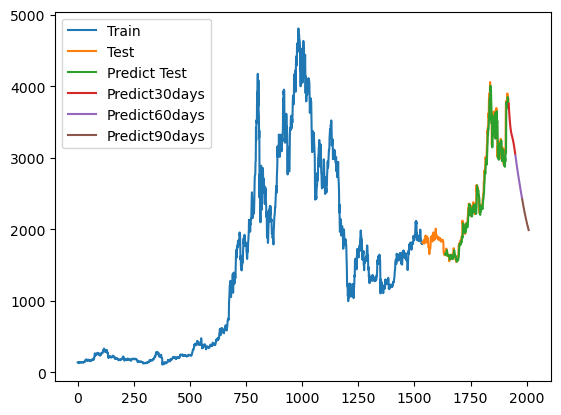

In [227]:
# 14.Vẽ hình

train_data_index = pd.RangeIndex(start=0, stop=train_size, step=1)
plt.plot(scaler.inverse_transform(train_data))

test_data_index = pd.RangeIndex(start=train_size, stop=train_size+test_size, step=1)
plt.plot(test_data_index,scaler.inverse_transform(test_data))

test_data_index = pd.RangeIndex(start=train_size+101, stop=train_size+test_size, step=1)
plt.plot(test_data_index,(y_pred))

# Vẽ dữ liệu dự đoán 30 ngày
predict_30days_index = pd.RangeIndex(start=len(df1) - 1, stop=len(df1) + 30 - 1, step=1)
plt.plot(predict_30days_index, scaler.inverse_transform(predicted_30_days))

# Vẽ dữ liệu dự đoán 60 ngày
predict_60days_index = pd.RangeIndex(start=len(df1) + 30 - 1, stop=len(df1) + 60 - 1, step=1)
plt.plot(predict_60days_index, scaler.inverse_transform(predicted_60_days)[30:])

# Vẽ dữ liệu dự đoán 90 ngày
predict_90days_index = pd.RangeIndex(start=len(df1) +60 -1, stop=len(df1) + 90 - 1, step=1)
plt.plot(predict_90days_index, scaler.inverse_transform(predicted_90_days)[60:])

plt.legend(['Train','Test','Predict Test','Predict30days','Predict60days','Predict90days'])
plt.show()

## Chia 7:3

In [228]:
df1=df_eth.reset_index()['close']
df1

0        138.50
1        135.60
2        133.23
3        128.39
4        140.00
         ...   
1916    3769.60
1917    3750.50
1918    3764.90
1919    3817.40
1920    3822.80
Name: close, Length: 1921, dtype: float64

In [229]:
# 3. Scaler data
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))

In [230]:
# 4. Chia train test
train_size = int(0.7 * len(df1))
test_size = int(0.3 * len(df1))

train_data = df1[:train_size]
test_data = df1[train_size:train_size+test_size]

# In kích thước của tập huấn luyện và tập kiểm tra
print(f"Train size: {len(train_data)}")
print(f"Test size: {len(test_data)}")

Train size: 1344
Test size: 576


In [231]:
# 5. Hàm Create Dataset
import numpy
# convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]   ###i=0, X=0,1,2,3-----99   Y=100 
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return numpy.array(dataX), numpy.array(dataY)

In [232]:
#6. Reshape into X=t,t+1,t+2..t+99 and Y=t+100

time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

# In kích thước của tập dữ liệu huấn luyện và kiểm tra để kiểm tra
print(f"X_train shape: {X_train.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_test shape: {ytest.shape}")

X_train shape: (1243, 100)
y_train shape: (1243,)
X_test shape: (475, 100)
y_test shape: (475,)


In [233]:
# 7. Reshape input to be [samples, time steps, features] which is required for LSTM
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [234]:
# 8. Define LSTM Model

model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

C:\Users\hoang\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [235]:
# 9. Fit mô hình với dữ liệu train
model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=100,batch_size=64,verbose=1)

Epoch 1/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 7s 91ms/step - loss: 0.0737 - val_loss: 0.0037
Epoch 2/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 71ms/step - loss: 0.0047 - val_loss: 0.0021
Epoch 3/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 68ms/step - loss: 0.0034 - val_loss: 0.0018
Epoch 4/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 70ms/step - loss: 0.0035 - val_loss: 0.0021
Epoch 5/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 70ms/step - loss: 0.0028 - val_loss: 0.0016
Epoch 6/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 71ms/step - loss: 0.0028 - val_loss: 0.0018
Epoch 7/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 68ms/step - loss: 0.0031 - val_loss: 0.0014
Epoch 8/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 65ms/step - loss: 0.0025 - val_loss: 0.0013
Epoch 9/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 66ms/step - loss: 0.0022 - val_loss: 0.0015
Epoch 10/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 71ms/step - loss: 0.0023 - val_loss: 0.0012
Epoch 11/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 64ms/step - loss: 0.0021 - val_loss: 0.0015
Epoch 12/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 63ms/step

In [236]:
# 10. Dự báo dữ liệu test
train_predict=model.predict(X_train)
y_pred=model.predict(X_test)

39/39 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step


In [237]:
# 11. Chuẩn hóa dữ liệu y_pred, y_pred_val
train_predict=scaler.inverse_transform(train_predict)
y_pred=scaler.inverse_transform(y_pred)

# Chuẩn hóa dữ liệu y_test
y_test_scaled = scaler.inverse_transform(ytest.reshape(-1, 1))

In [238]:
# 12. Đánh giá độ chính xác thuật toán bằng RMSE, MSE, MAPE
test_rmse = np.sqrt(np.mean((y_pred - y_test_scaled)**2))
test_mse = np.mean((y_pred - y_test_scaled)**2)
test_mape = np.mean(np.abs((y_test_scaled - y_pred) / y_test_scaled)) * 100

print('Testing RMSE:', test_rmse)
print('Testing MSE:', test_mse)
print('Testing MAPE:', test_mape)


Testing RMSE: 73.38917736203696
Testing MSE: 5385.971353876519
Testing MAPE: 2.035185230453472


In [239]:
# 13. Hàm dự đoán cho n ngày tiếp theo
def predict_future_days(n_days, test_data, model):
    x_input = test_data[60:].reshape(1, -1)
    temp_input=list(x_input)
    temp_input=temp_input[0].tolist()
    
    lst_output = []
    n_steps=x_input.shape[1]
    i=0
    while(i< n_days):
        if(len(temp_input)>x_input.shape[1]):
            #print(temp_input)
            x_input=np.array(temp_input[1:])
            #print("{} day input {}".format(i,x_input))
            x_input=x_input.reshape(1,-1)
            x_input = x_input.reshape((1, n_steps, 1))
            #print(x_input)
            yhat = model.predict(x_input, verbose=0)
            #print("{} day output {}".format(i,yhat))
            temp_input.extend(yhat[0].tolist())
            temp_input=temp_input[1:]
            #print(temp_input)
            lst_output.extend(yhat.tolist())
            i=i+1
        else:
            x_input = x_input.reshape((1, n_steps,1))
            yhat = model.predict(x_input, verbose=0)
            #print(yhat[0])
            temp_input.extend(yhat[0].tolist())
            #print(len(temp_input))
            lst_output.extend(yhat.tolist())
            i=i+1
    
    return lst_output

# Dự đoán 30 ngày tiếp theo
predicted_30_days = predict_future_days(30, test_data, model)

# Dự đoán 60 ngày tiếp theo
predicted_60_days = predict_future_days(60, test_data, model)

# Dự đoán 90 ngày tiếp theo
predicted_90_days = predict_future_days(90, test_data, model)

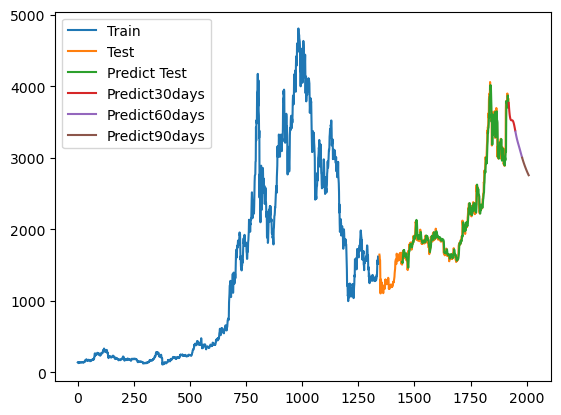

In [240]:
# 14.Vẽ hình

train_data_index = pd.RangeIndex(start=0, stop=train_size, step=1)
plt.plot(scaler.inverse_transform(train_data))

test_data_index = pd.RangeIndex(start=train_size, stop=train_size+test_size, step=1)
plt.plot(test_data_index,scaler.inverse_transform(test_data))

test_data_index = pd.RangeIndex(start=train_size+101, stop=train_size+test_size, step=1)
plt.plot(test_data_index,(y_pred))

# Vẽ dữ liệu dự đoán 30 ngày
predict_30days_index = pd.RangeIndex(start=len(df1) - 1, stop=len(df1) + 30 - 1, step=1)
plt.plot(predict_30days_index, scaler.inverse_transform(predicted_30_days))

# Vẽ dữ liệu dự đoán 60 ngày
predict_60days_index = pd.RangeIndex(start=len(df1) + 30 - 1, stop=len(df1) + 60 - 1, step=1)
plt.plot(predict_60days_index, scaler.inverse_transform(predicted_60_days)[30:])

# Vẽ dữ liệu dự đoán 90 ngày
predict_90days_index = pd.RangeIndex(start=len(df1) +60 -1, stop=len(df1) + 90 - 1, step=1)
plt.plot(predict_90days_index, scaler.inverse_transform(predicted_90_days)[60:])

plt.legend(['Train','Test','Predict Test','Predict30days','Predict60days','Predict90days'])
plt.show()

## Chia 6:4

In [241]:
df1=df_eth.reset_index()['close']
df1

0        138.50
1        135.60
2        133.23
3        128.39
4        140.00
         ...   
1916    3769.60
1917    3750.50
1918    3764.90
1919    3817.40
1920    3822.80
Name: close, Length: 1921, dtype: float64

In [242]:
# 3. Scaler data
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))

In [243]:
# 4. Chia train test
train_size = int(0.6 * len(df1))
test_size = int(0.4 * len(df1))

train_data = df1[:train_size]
test_data = df1[train_size:train_size+test_size]

# In kích thước của tập huấn luyện và tập kiểm tra
print(f"Train size: {len(train_data)}")
print(f"Test size: {len(test_data)}")

Train size: 1152
Test size: 768


In [244]:
# 5. Hàm Create Dataset
import numpy
# convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]   ###i=0, X=0,1,2,3-----99   Y=100 
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return numpy.array(dataX), numpy.array(dataY)

In [245]:
#6. Reshape into X=t,t+1,t+2..t+99 and Y=t+100

time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

# In kích thước của tập dữ liệu huấn luyện và kiểm tra để kiểm tra
print(f"X_train shape: {X_train.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_test shape: {ytest.shape}")

X_train shape: (1051, 100)
y_train shape: (1051,)
X_test shape: (667, 100)
y_test shape: (667,)


In [246]:
# 7. Reshape input to be [samples, time steps, features] which is required for LSTM
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [247]:
# 8. Define LSTM Model

model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

C:\Users\hoang\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [248]:
# 9. Fit mô hình với dữ liệu train
model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=100,batch_size=64,verbose=1)

Epoch 1/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 6s 102ms/step - loss: 0.0680 - val_loss: 0.0031
Epoch 2/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 75ms/step - loss: 0.0044 - val_loss: 0.0019
Epoch 3/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 75ms/step - loss: 0.0034 - val_loss: 0.0019
Epoch 4/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 74ms/step - loss: 0.0035 - val_loss: 0.0029
Epoch 5/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 74ms/step - loss: 0.0029 - val_loss: 0.0025
Epoch 6/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 79ms/step - loss: 0.0029 - val_loss: 0.0032
Epoch 7/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 72ms/step - loss: 0.0031 - val_loss: 0.0016
Epoch 8/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 78ms/step - loss: 0.0032 - val_loss: 0.0015
Epoch 9/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 76ms/step - loss: 0.0025 - val_loss: 0.0019
Epoch 10/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 76ms/step - loss: 0.0028 - val_loss: 0.0016
Epoch 11/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 73ms/step - loss: 0.0020 - val_loss: 0.0014
Epoch 12/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 72ms/ste

In [249]:
# 10. Dự báo dữ liệu test
train_predict=model.predict(X_train)
y_pred=model.predict(X_test)

33/33 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step


In [250]:
# 11. Chuẩn hóa dữ liệu y_pred, y_pred_val
train_predict=scaler.inverse_transform(train_predict)
y_pred=scaler.inverse_transform(y_pred)

# Chuẩn hóa dữ liệu y_test
y_test_scaled = scaler.inverse_transform(ytest.reshape(-1, 1))

In [251]:
# 12. Đánh giá độ chính xác thuật toán bằng RMSE, MSE, MAPE
test_rmse = np.sqrt(np.mean((y_pred - y_test_scaled)**2))
test_mse = np.mean((y_pred - y_test_scaled)**2)
test_mape = np.mean(np.abs((y_test_scaled - y_pred) / y_test_scaled)) * 100

print('Testing RMSE:', test_rmse)
print('Testing MSE:', test_mse)
print('Testing MAPE:', test_mape)


Testing RMSE: 83.40602048105535
Testing MSE: 6956.564252486225
Testing MAPE: 2.7206414521262836


In [252]:
# 13. Hàm dự đoán cho n ngày tiếp theo
def predict_future_days(n_days, test_data, model):
    x_input = test_data[60:].reshape(1, -1)
    temp_input=list(x_input)
    temp_input=temp_input[0].tolist()
    
    lst_output = []
    n_steps=x_input.shape[1]
    i=0
    while(i< n_days):
        if(len(temp_input)>x_input.shape[1]):
            #print(temp_input)
            x_input=np.array(temp_input[1:])
            #print("{} day input {}".format(i,x_input))
            x_input=x_input.reshape(1,-1)
            x_input = x_input.reshape((1, n_steps, 1))
            #print(x_input)
            yhat = model.predict(x_input, verbose=0)
            #print("{} day output {}".format(i,yhat))
            temp_input.extend(yhat[0].tolist())
            temp_input=temp_input[1:]
            #print(temp_input)
            lst_output.extend(yhat.tolist())
            i=i+1
        else:
            x_input = x_input.reshape((1, n_steps,1))
            yhat = model.predict(x_input, verbose=0)
            #print(yhat[0])
            temp_input.extend(yhat[0].tolist())
            #print(len(temp_input))
            lst_output.extend(yhat.tolist())
            i=i+1
    
    return lst_output

# Dự đoán 30 ngày tiếp theo
predicted_30_days = predict_future_days(30, test_data, model)

# Dự đoán 60 ngày tiếp theo
predicted_60_days = predict_future_days(60, test_data, model)

# Dự đoán 90 ngày tiếp theo
predicted_90_days = predict_future_days(90, test_data, model)

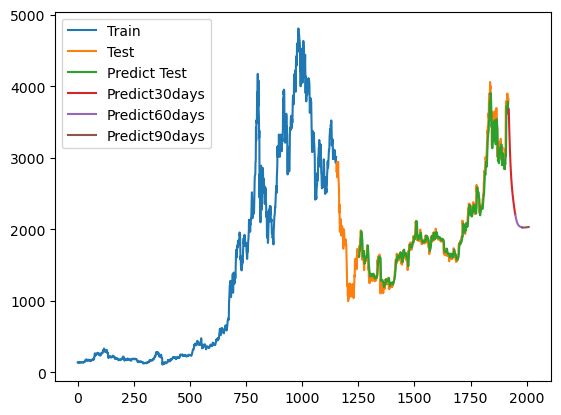

In [253]:
# 14.Vẽ hình

train_data_index = pd.RangeIndex(start=0, stop=train_size, step=1)
plt.plot(scaler.inverse_transform(train_data))

test_data_index = pd.RangeIndex(start=train_size, stop=train_size+test_size, step=1)
plt.plot(test_data_index,scaler.inverse_transform(test_data))

test_data_index = pd.RangeIndex(start=train_size+101, stop=train_size+test_size, step=1)
plt.plot(test_data_index,(y_pred))

# Vẽ dữ liệu dự đoán 30 ngày
predict_30days_index = pd.RangeIndex(start=len(df1) - 1, stop=len(df1) + 30 - 1, step=1)
plt.plot(predict_30days_index, scaler.inverse_transform(predicted_30_days))

# Vẽ dữ liệu dự đoán 60 ngày
predict_60days_index = pd.RangeIndex(start=len(df1) + 30 - 1, stop=len(df1) + 60 - 1, step=1)
plt.plot(predict_60days_index, scaler.inverse_transform(predicted_60_days)[30:])

# Vẽ dữ liệu dự đoán 90 ngày
predict_90days_index = pd.RangeIndex(start=len(df1) +60 -1, stop=len(df1) + 90 - 1, step=1)
plt.plot(predict_90days_index, scaler.inverse_transform(predicted_90_days)[60:])

plt.legend(['Train','Test','Predict Test','Predict30days','Predict60days','Predict90days'])
plt.show()

# LTC

## Chia 8:2

In [254]:
df1=df_ltc.reset_index()['close']
df1

0       48.150
1       49.570
2       48.880
3       46.820
4       53.840
         ...  
1916    83.631
1917    84.465
1918    83.330
1919    83.519
1920    83.351
Name: close, Length: 1921, dtype: float64

In [255]:
# 3. Scaler data
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))

In [256]:
# 4. Chia train test
train_size = int(0.8 * len(df1))
test_size = int(0.2 * len(df1))

train_data = df1[:train_size]
test_data = df1[train_size:train_size+test_size]

# In kích thước của tập huấn luyện và tập kiểm tra
print(f"Train size: {len(train_data)}")
print(f"Test size: {len(test_data)}")

Train size: 1536
Test size: 384


In [257]:
# 5. Hàm Create Dataset
import numpy
# convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]   ###i=0, X=0,1,2,3-----99   Y=100 
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return numpy.array(dataX), numpy.array(dataY)

In [258]:
#6. Reshape into X=t,t+1,t+2..t+99 and Y=t+100

time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

# In kích thước của tập dữ liệu huấn luyện và kiểm tra để kiểm tra
print(f"X_train shape: {X_train.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_test shape: {ytest.shape}")

X_train shape: (1435, 100)
y_train shape: (1435,)
X_test shape: (283, 100)
y_test shape: (283,)


In [259]:
# 7. Reshape input to be [samples, time steps, features] which is required for LSTM
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [260]:
# 8. Define LSTM Model

model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

C:\Users\hoang\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [261]:
# 9. Fit mô hình với dữ liệu train
model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=100,batch_size=64,verbose=1)

Epoch 1/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 5s 81ms/step - loss: 0.0264 - val_loss: 0.0027
Epoch 2/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 2s 66ms/step - loss: 0.0039 - val_loss: 2.7606e-04
Epoch 3/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 60ms/step - loss: 0.0026 - val_loss: 3.3143e-04
Epoch 4/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 2s 67ms/step - loss: 0.0026 - val_loss: 2.8915e-04
Epoch 5/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 64ms/step - loss: 0.0022 - val_loss: 3.3296e-04
Epoch 6/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 62ms/step - loss: 0.0027 - val_loss: 2.7788e-04
Epoch 7/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 59ms/step - loss: 0.0017 - val_loss: 2.4243e-04
Epoch 8/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 60ms/step - loss: 0.0020 - val_loss: 2.4342e-04
Epoch 9/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 60ms/step - loss: 0.0019 - val_loss: 2.1211e-04
Epoch 10/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 61ms/step - loss: 0.0016 - val_loss: 2.0951e-04
Epoch 11/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 59ms/step - loss: 0.0018 - val_loss: 2.3453e-04
Epoch 12/100

In [262]:
# 10. Dự báo dữ liệu test
train_predict=model.predict(X_train)
y_pred=model.predict(X_test)

45/45 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step


In [263]:
# 11. Chuẩn hóa dữ liệu y_pred, y_pred_val
train_predict=scaler.inverse_transform(train_predict)
y_pred=scaler.inverse_transform(y_pred)

# Chuẩn hóa dữ liệu y_test
y_test_scaled = scaler.inverse_transform(ytest.reshape(-1, 1))

In [264]:
# 12. Đánh giá độ chính xác thuật toán bằng RMSE, MSE, MAPE
test_rmse = np.sqrt(np.mean((y_pred - y_test_scaled)**2))
test_mse = np.mean((y_pred - y_test_scaled)**2)
test_mape = np.mean(np.abs((y_test_scaled - y_pred) / y_test_scaled)) * 100

print('Testing RMSE:', test_rmse)
print('Testing MSE:', test_mse)
print('Testing MAPE:', test_mape)


Testing RMSE: 3.8739215200386146
Testing MSE: 15.00726794341829
Testing MAPE: 3.8873790523367773


In [265]:
# 13. Hàm dự đoán cho n ngày tiếp theo
def predict_future_days(n_days, test_data, model):
    x_input = test_data[60:].reshape(1, -1)
    temp_input=list(x_input)
    temp_input=temp_input[0].tolist()
    
    lst_output = []
    n_steps=x_input.shape[1]
    i=0
    while(i< n_days):
        if(len(temp_input)>x_input.shape[1]):
            #print(temp_input)
            x_input=np.array(temp_input[1:])
            #print("{} day input {}".format(i,x_input))
            x_input=x_input.reshape(1,-1)
            x_input = x_input.reshape((1, n_steps, 1))
            #print(x_input)
            yhat = model.predict(x_input, verbose=0)
            #print("{} day output {}".format(i,yhat))
            temp_input.extend(yhat[0].tolist())
            temp_input=temp_input[1:]
            #print(temp_input)
            lst_output.extend(yhat.tolist())
            i=i+1
        else:
            x_input = x_input.reshape((1, n_steps,1))
            yhat = model.predict(x_input, verbose=0)
            #print(yhat[0])
            temp_input.extend(yhat[0].tolist())
            #print(len(temp_input))
            lst_output.extend(yhat.tolist())
            i=i+1
    
    return lst_output

# Dự đoán 30 ngày tiếp theo
predicted_30_days = predict_future_days(30, test_data, model)

# Dự đoán 60 ngày tiếp theo
predicted_60_days = predict_future_days(60, test_data, model)

# Dự đoán 90 ngày tiếp theo
predicted_90_days = predict_future_days(90, test_data, model)

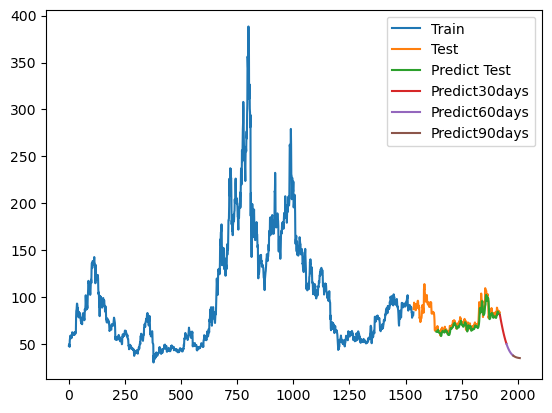

In [266]:
# 14.Vẽ hình

train_data_index = pd.RangeIndex(start=0, stop=train_size, step=1)
plt.plot(scaler.inverse_transform(train_data))

test_data_index = pd.RangeIndex(start=train_size, stop=train_size+test_size, step=1)
plt.plot(test_data_index,scaler.inverse_transform(test_data))

test_data_index = pd.RangeIndex(start=train_size+101, stop=train_size+test_size, step=1)
plt.plot(test_data_index,(y_pred))

# Vẽ dữ liệu dự đoán 30 ngày
predict_30days_index = pd.RangeIndex(start=len(df1) - 1, stop=len(df1) + 30 - 1, step=1)
plt.plot(predict_30days_index, scaler.inverse_transform(predicted_30_days))

# Vẽ dữ liệu dự đoán 60 ngày
predict_60days_index = pd.RangeIndex(start=len(df1) + 30 - 1, stop=len(df1) + 60 - 1, step=1)
plt.plot(predict_60days_index, scaler.inverse_transform(predicted_60_days)[30:])

# Vẽ dữ liệu dự đoán 90 ngày
predict_90days_index = pd.RangeIndex(start=len(df1) +60 -1, stop=len(df1) + 90 - 1, step=1)
plt.plot(predict_90days_index, scaler.inverse_transform(predicted_90_days)[60:])

plt.legend(['Train','Test','Predict Test','Predict30days','Predict60days','Predict90days'])
plt.show()

## Chia 7:3

In [267]:
df1=df_ltc.reset_index()['close']
df1

0       48.150
1       49.570
2       48.880
3       46.820
4       53.840
         ...  
1916    83.631
1917    84.465
1918    83.330
1919    83.519
1920    83.351
Name: close, Length: 1921, dtype: float64

In [268]:
# 3. Scaler data
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))

In [269]:
# 4. Chia train test
train_size = int(0.7 * len(df1))
test_size = int(0.3 * len(df1))

train_data = df1[:train_size]
test_data = df1[train_size:train_size+test_size]

# In kích thước của tập huấn luyện và tập kiểm tra
print(f"Train size: {len(train_data)}")
print(f"Test size: {len(test_data)}")

Train size: 1344
Test size: 576


In [270]:
# 5. Hàm Create Dataset
import numpy
# convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]   ###i=0, X=0,1,2,3-----99   Y=100 
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return numpy.array(dataX), numpy.array(dataY)

In [271]:
#6. Reshape into X=t,t+1,t+2..t+99 and Y=t+100

time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

# In kích thước của tập dữ liệu huấn luyện và kiểm tra để kiểm tra
print(f"X_train shape: {X_train.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_test shape: {ytest.shape}")

X_train shape: (1243, 100)
y_train shape: (1243,)
X_test shape: (475, 100)
y_test shape: (475,)


In [272]:
# 7. Reshape input to be [samples, time steps, features] which is required for LSTM
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [273]:
# 8. Define LSTM Model

model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

C:\Users\hoang\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [274]:
# 9. Fit mô hình với dữ liệu train
model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=100,batch_size=64,verbose=1)

Epoch 1/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 5s 86ms/step - loss: 0.0355 - val_loss: 4.6858e-04
Epoch 2/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 66ms/step - loss: 0.0043 - val_loss: 3.9245e-04
Epoch 3/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 64ms/step - loss: 0.0038 - val_loss: 3.9997e-04
Epoch 4/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 66ms/step - loss: 0.0035 - val_loss: 4.0562e-04
Epoch 5/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 65ms/step - loss: 0.0030 - val_loss: 5.6436e-04
Epoch 6/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 65ms/step - loss: 0.0030 - val_loss: 4.2243e-04
Epoch 7/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 64ms/step - loss: 0.0024 - val_loss: 5.4822e-04
Epoch 8/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 66ms/step - loss: 0.0025 - val_loss: 3.7867e-04
Epoch 9/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 66ms/step - loss: 0.0022 - val_loss: 3.0275e-04
Epoch 10/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 65ms/step - loss: 0.0021 - val_loss: 2.9212e-04
Epoch 11/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 67ms/step - loss: 0.0021 - val_loss: 4.8045e-04
Epoch 12

In [275]:
# 10. Dự báo dữ liệu test
train_predict=model.predict(X_train)
y_pred=model.predict(X_test)

39/39 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


In [276]:
# 11. Chuẩn hóa dữ liệu y_pred, y_pred_val
train_predict=scaler.inverse_transform(train_predict)
y_pred=scaler.inverse_transform(y_pred)

# Chuẩn hóa dữ liệu y_test
y_test_scaled = scaler.inverse_transform(ytest.reshape(-1, 1))

In [277]:
# 12. Đánh giá độ chính xác thuật toán bằng RMSE, MSE, MAPE
test_rmse = np.sqrt(np.mean((y_pred - y_test_scaled)**2))
test_mse = np.mean((y_pred - y_test_scaled)**2)
test_mape = np.mean(np.abs((y_test_scaled - y_pred) / y_test_scaled)) * 100

print('Testing RMSE:', test_rmse)
print('Testing MSE:', test_mse)
print('Testing MAPE:', test_mape)


Testing RMSE: 3.704011265288775
Testing MSE: 13.719699453386152
Testing MAPE: 2.9663285786545837


In [278]:
# 13. Hàm dự đoán cho n ngày tiếp theo
def predict_future_days(n_days, test_data, model):
    x_input = test_data[60:].reshape(1, -1)
    temp_input=list(x_input)
    temp_input=temp_input[0].tolist()
    
    lst_output = []
    n_steps=x_input.shape[1]
    i=0
    while(i< n_days):
        if(len(temp_input)>x_input.shape[1]):
            #print(temp_input)
            x_input=np.array(temp_input[1:])
            #print("{} day input {}".format(i,x_input))
            x_input=x_input.reshape(1,-1)
            x_input = x_input.reshape((1, n_steps, 1))
            #print(x_input)
            yhat = model.predict(x_input, verbose=0)
            #print("{} day output {}".format(i,yhat))
            temp_input.extend(yhat[0].tolist())
            temp_input=temp_input[1:]
            #print(temp_input)
            lst_output.extend(yhat.tolist())
            i=i+1
        else:
            x_input = x_input.reshape((1, n_steps,1))
            yhat = model.predict(x_input, verbose=0)
            #print(yhat[0])
            temp_input.extend(yhat[0].tolist())
            #print(len(temp_input))
            lst_output.extend(yhat.tolist())
            i=i+1
    
    return lst_output

# Dự đoán 30 ngày tiếp theo
predicted_30_days = predict_future_days(30, test_data, model)

# Dự đoán 60 ngày tiếp theo
predicted_60_days = predict_future_days(60, test_data, model)

# Dự đoán 90 ngày tiếp theo
predicted_90_days = predict_future_days(90, test_data, model)

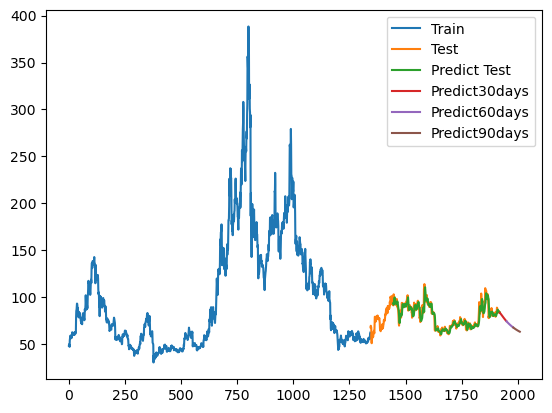

In [279]:
# 14.Vẽ hình

train_data_index = pd.RangeIndex(start=0, stop=train_size, step=1)
plt.plot(scaler.inverse_transform(train_data))

test_data_index = pd.RangeIndex(start=train_size, stop=train_size+test_size, step=1)
plt.plot(test_data_index,scaler.inverse_transform(test_data))

test_data_index = pd.RangeIndex(start=train_size+101, stop=train_size+test_size, step=1)
plt.plot(test_data_index,(y_pred))

# Vẽ dữ liệu dự đoán 30 ngày
predict_30days_index = pd.RangeIndex(start=len(df1) - 1, stop=len(df1) + 30 - 1, step=1)
plt.plot(predict_30days_index, scaler.inverse_transform(predicted_30_days))

# Vẽ dữ liệu dự đoán 60 ngày
predict_60days_index = pd.RangeIndex(start=len(df1) + 30 - 1, stop=len(df1) + 60 - 1, step=1)
plt.plot(predict_60days_index, scaler.inverse_transform(predicted_60_days)[30:])

# Vẽ dữ liệu dự đoán 90 ngày
predict_90days_index = pd.RangeIndex(start=len(df1) +60 -1, stop=len(df1) + 90 - 1, step=1)
plt.plot(predict_90days_index, scaler.inverse_transform(predicted_90_days)[60:])

plt.legend(['Train','Test','Predict Test','Predict30days','Predict60days','Predict90days'])
plt.show()

## Chia 6:4

In [280]:
df1=df_ltc.reset_index()['close']
df1

0       48.150
1       49.570
2       48.880
3       46.820
4       53.840
         ...  
1916    83.631
1917    84.465
1918    83.330
1919    83.519
1920    83.351
Name: close, Length: 1921, dtype: float64

In [281]:
# 3. Scaler data
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))

In [282]:
# 4. Chia train test
train_size = int(0.6 * len(df1))
test_size = int(0.4 * len(df1))

train_data = df1[:train_size]
test_data = df1[train_size:train_size+test_size]

# In kích thước của tập huấn luyện và tập kiểm tra
print(f"Train size: {len(train_data)}")
print(f"Test size: {len(test_data)}")

Train size: 1152
Test size: 768


In [283]:
# 5. Hàm Create Dataset
import numpy
# convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]   ###i=0, X=0,1,2,3-----99   Y=100 
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return numpy.array(dataX), numpy.array(dataY)

In [284]:
#6. Reshape into X=t,t+1,t+2..t+99 and Y=t+100

time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

# In kích thước của tập dữ liệu huấn luyện và kiểm tra để kiểm tra
print(f"X_train shape: {X_train.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_test shape: {ytest.shape}")

X_train shape: (1051, 100)
y_train shape: (1051,)
X_test shape: (667, 100)
y_test shape: (667,)


In [285]:
# 7. Reshape input to be [samples, time steps, features] which is required for LSTM
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [286]:
# 8. Define LSTM Model

model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

C:\Users\hoang\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [287]:
# 9. Fit mô hình với dữ liệu train
model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=100,batch_size=64,verbose=1)

Epoch 1/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 5s 96ms/step - loss: 0.0410 - val_loss: 6.0258e-04
Epoch 2/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 76ms/step - loss: 0.0070 - val_loss: 4.7434e-04
Epoch 3/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 84ms/step - loss: 0.0038 - val_loss: 3.5989e-04
Epoch 4/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 2s 97ms/step - loss: 0.0034 - val_loss: 6.2348e-04
Epoch 5/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 74ms/step - loss: 0.0034 - val_loss: 3.4959e-04
Epoch 6/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 77ms/step - loss: 0.0033 - val_loss: 4.0004e-04
Epoch 7/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 73ms/step - loss: 0.0030 - val_loss: 3.4144e-04
Epoch 8/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 71ms/step - loss: 0.0026 - val_loss: 3.0227e-04
Epoch 9/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 73ms/step - loss: 0.0028 - val_loss: 3.1913e-04
Epoch 10/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 74ms/step - loss: 0.0024 - val_loss: 3.4215e-04
Epoch 11/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 72ms/step - loss: 0.0019 - val_loss: 3.2858e-04
Epoch 12

In [288]:
# 10. Dự báo dữ liệu test
train_predict=model.predict(X_train)
y_pred=model.predict(X_test)

33/33 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


In [289]:
# 11. Chuẩn hóa dữ liệu y_pred, y_pred_val
train_predict=scaler.inverse_transform(train_predict)
y_pred=scaler.inverse_transform(y_pred)

# Chuẩn hóa dữ liệu y_test
y_test_scaled = scaler.inverse_transform(ytest.reshape(-1, 1))

In [290]:
# 12. Đánh giá độ chính xác thuật toán bằng RMSE, MSE, MAPE
test_rmse = np.sqrt(np.mean((y_pred - y_test_scaled)**2))
test_mse = np.mean((y_pred - y_test_scaled)**2)
test_mape = np.mean(np.abs((y_test_scaled - y_pred) / y_test_scaled)) * 100

print('Testing RMSE:', test_rmse)
print('Testing MSE:', test_mse)
print('Testing MAPE:', test_mape)


Testing RMSE: 5.045860021477654
Testing MSE: 25.460703356346464
Testing MAPE: 5.161108493986364


In [291]:
# 13. Hàm dự đoán cho n ngày tiếp theo
def predict_future_days(n_days, test_data, model):
    x_input = test_data[60:].reshape(1, -1)
    temp_input=list(x_input)
    temp_input=temp_input[0].tolist()
    
    lst_output = []
    n_steps=x_input.shape[1]
    i=0
    while(i< n_days):
        if(len(temp_input)>x_input.shape[1]):
            #print(temp_input)
            x_input=np.array(temp_input[1:])
            #print("{} day input {}".format(i,x_input))
            x_input=x_input.reshape(1,-1)
            x_input = x_input.reshape((1, n_steps, 1))
            #print(x_input)
            yhat = model.predict(x_input, verbose=0)
            #print("{} day output {}".format(i,yhat))
            temp_input.extend(yhat[0].tolist())
            temp_input=temp_input[1:]
            #print(temp_input)
            lst_output.extend(yhat.tolist())
            i=i+1
        else:
            x_input = x_input.reshape((1, n_steps,1))
            yhat = model.predict(x_input, verbose=0)
            #print(yhat[0])
            temp_input.extend(yhat[0].tolist())
            #print(len(temp_input))
            lst_output.extend(yhat.tolist())
            i=i+1
    
    return lst_output

# Dự đoán 30 ngày tiếp theo
predicted_30_days = predict_future_days(30, test_data, model)

# Dự đoán 60 ngày tiếp theo
predicted_60_days = predict_future_days(60, test_data, model)

# Dự đoán 90 ngày tiếp theo
predicted_90_days = predict_future_days(90, test_data, model)

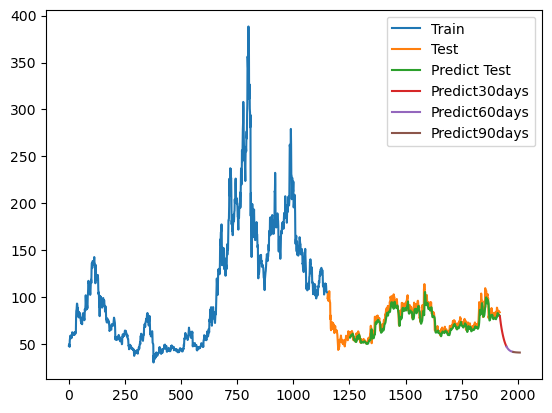

In [292]:
# 14.Vẽ hình

train_data_index = pd.RangeIndex(start=0, stop=train_size, step=1)
plt.plot(scaler.inverse_transform(train_data))

test_data_index = pd.RangeIndex(start=train_size, stop=train_size+test_size, step=1)
plt.plot(test_data_index,scaler.inverse_transform(test_data))

test_data_index = pd.RangeIndex(start=train_size+101, stop=train_size+test_size, step=1)
plt.plot(test_data_index,(y_pred))

# Vẽ dữ liệu dự đoán 30 ngày
predict_30days_index = pd.RangeIndex(start=len(df1) - 1, stop=len(df1) + 30 - 1, step=1)
plt.plot(predict_30days_index, scaler.inverse_transform(predicted_30_days))

# Vẽ dữ liệu dự đoán 60 ngày
predict_60days_index = pd.RangeIndex(start=len(df1) + 30 - 1, stop=len(df1) + 60 - 1, step=1)
plt.plot(predict_60days_index, scaler.inverse_transform(predicted_60_days)[30:])

# Vẽ dữ liệu dự đoán 90 ngày
predict_90days_index = pd.RangeIndex(start=len(df1) +60 -1, stop=len(df1) + 90 - 1, step=1)
plt.plot(predict_90days_index, scaler.inverse_transform(predicted_90_days)[60:])

plt.legend(['Train','Test','Predict Test','Predict30days','Predict60days','Predict90days'])
plt.show()